In [1]:
# Packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings handle
import warnings
warnings.filterwarnings("ignore")

# To display plots within the notebook
%matplotlib inline

# importing the dataset
filename = "/kaggle/input/most-used-beauty-cosmetics-products-in-the-world/most_used_beauty_cosmetics_products_extended.csv"
df = pd.read_csv(filename)

## Explore the dataset

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


,Price_USD,Rating,Number_of_Reviews
count,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333
std,40.402983,1.168029,2855.665464
min,10.000000,1.000000,52.000000
25%,45.480000,2.000000,2562.000000
50%,80.040000,3.000000,5002.000000
75%,114.760000,4.000000,7497.000000
max,149.990000,5.000000,10000.000000


In [3]:
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


## Product Performance

#### Top Selling Product Category

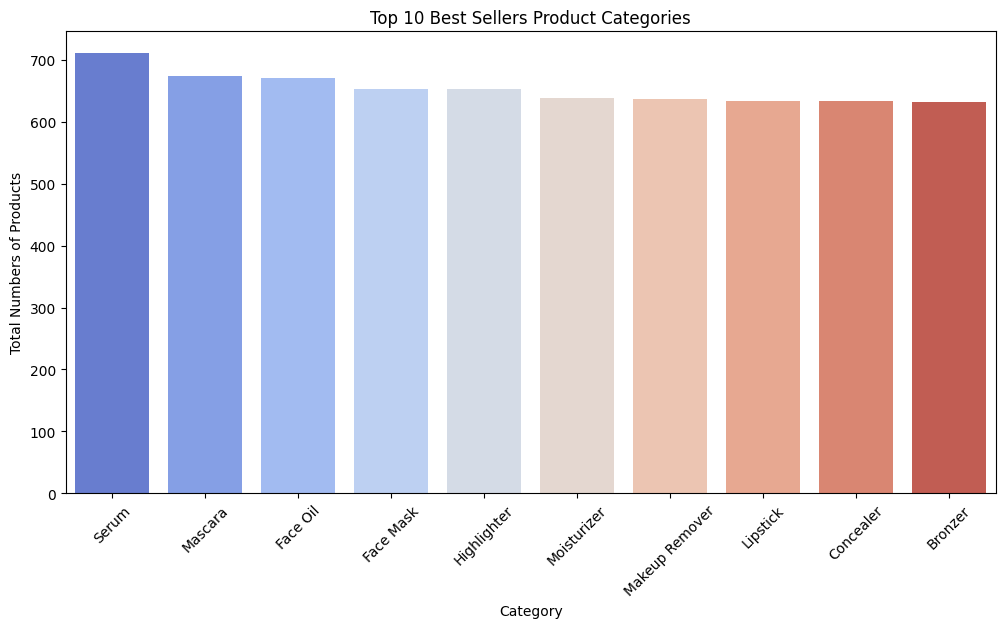

In [4]:
perf_category = df.pivot_table(
    index = 'Category',
    aggfunc = {'Product_Name' : 'count', 'Rating' : 'mean', 'Number_of_Reviews' : 'sum'}
    ).reset_index()

perf_category = perf_category.rename(columns={'Product_Name': 'Number_of_Products'})

plt.figure(figsize=(12, 6))
sns.barplot(data=perf_category.sort_values(by='Number_of_Products', ascending = False).head(10), x='Category', y='Number_of_Products', palette='coolwarm')

plt.title('Top 10 Best Sellers Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Numbers of Products')
plt.xticks(rotation=45)
plt.show()


### Country Distribution

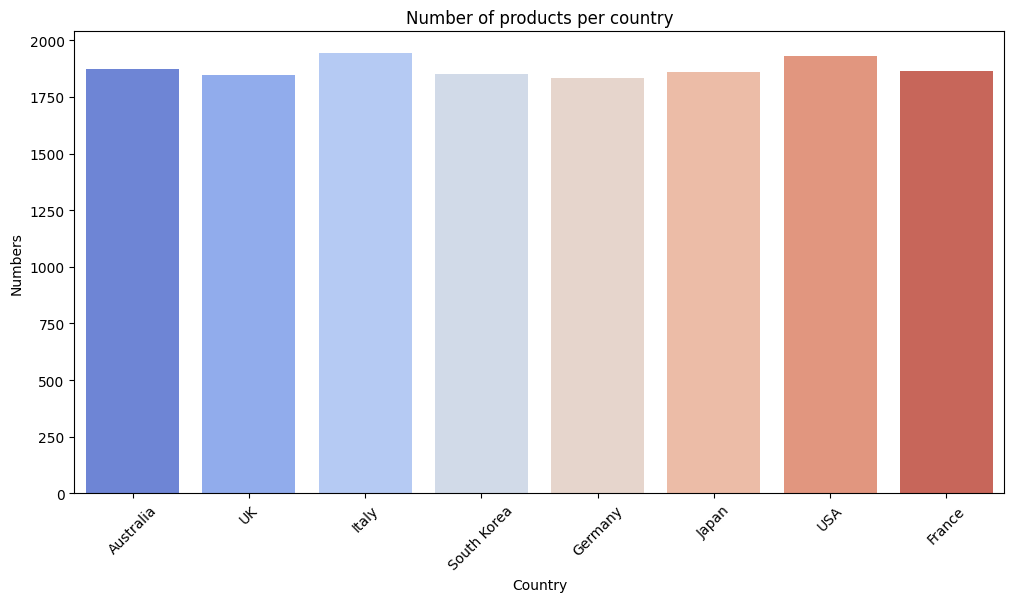

In [5]:
plt.figure(figsize=(12,6)) 
sns.countplot(x = 'Country_of_Origin', data = df, palette = 'coolwarm')
plt.title('Number of products per country')
plt.xlabel('Country')
plt.ylabel('Numbers')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

### Product Size Distribution

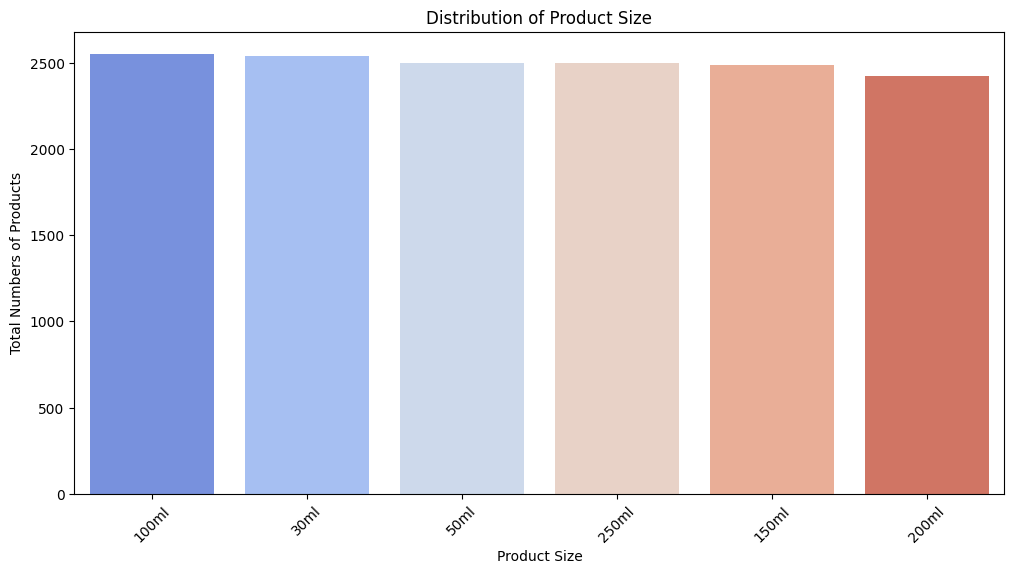

In [6]:
Product_Size_Dist = df.groupby('Product_Size')['Product_Name'].count().reset_index().sort_values(by = 'Product_Name', ascending = False)

# figure
plt.figure(figsize=(12, 6))
sns.barplot(Product_Size_Dist, x = 'Product_Size', y = "Product_Name", palette = 'coolwarm')
plt.title('Distribution of Product Size')
plt.xlabel('Product Size')
plt.ylabel('Total Numbers of Products')
plt.xticks(rotation=45)
plt.show()

### Top Rating Products

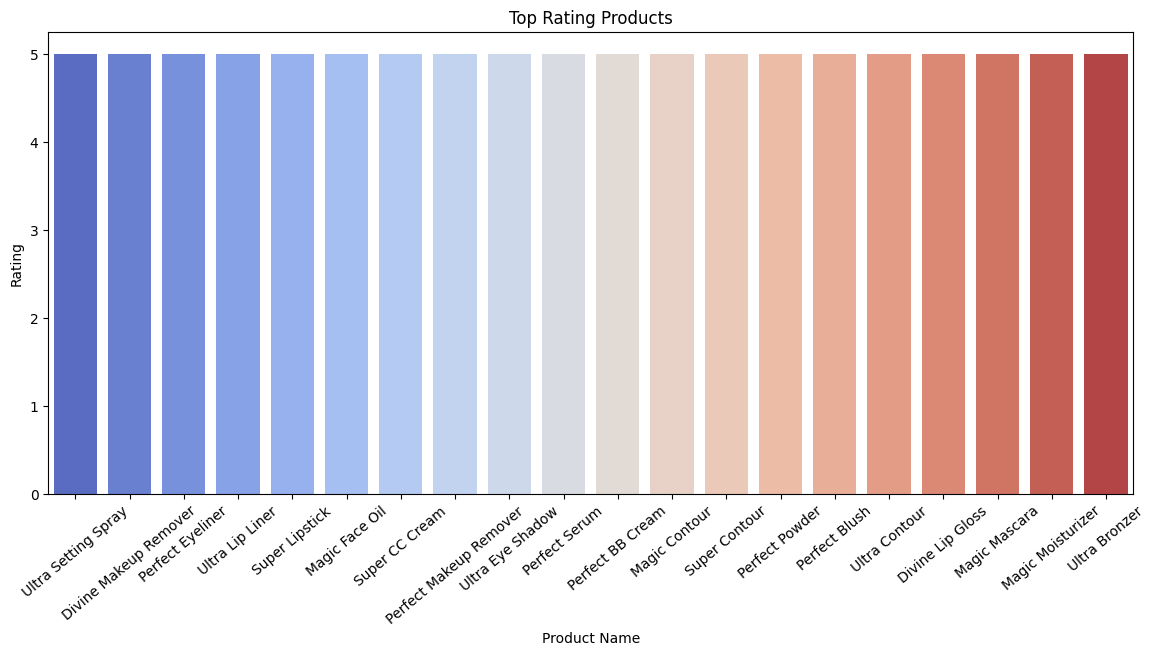

In [7]:
BestRated = df[['Product_Name','Rating']].sort_values(by = 'Rating', ascending = False).reset_index()

# figure 
plt.figure(figsize=(14, 6))
sns.barplot(BestRated.head(20), x = "Product_Name", y = 'Rating', palette = "coolwarm")
plt.xticks(rotation = 40)
plt.title('Top Rating Products')
plt.xlabel('Product Name')
plt.ylabel('Rating')
plt.show()


### Cruelty Free Performance Comparison 
(Number of products, Average Price & Average Rating)

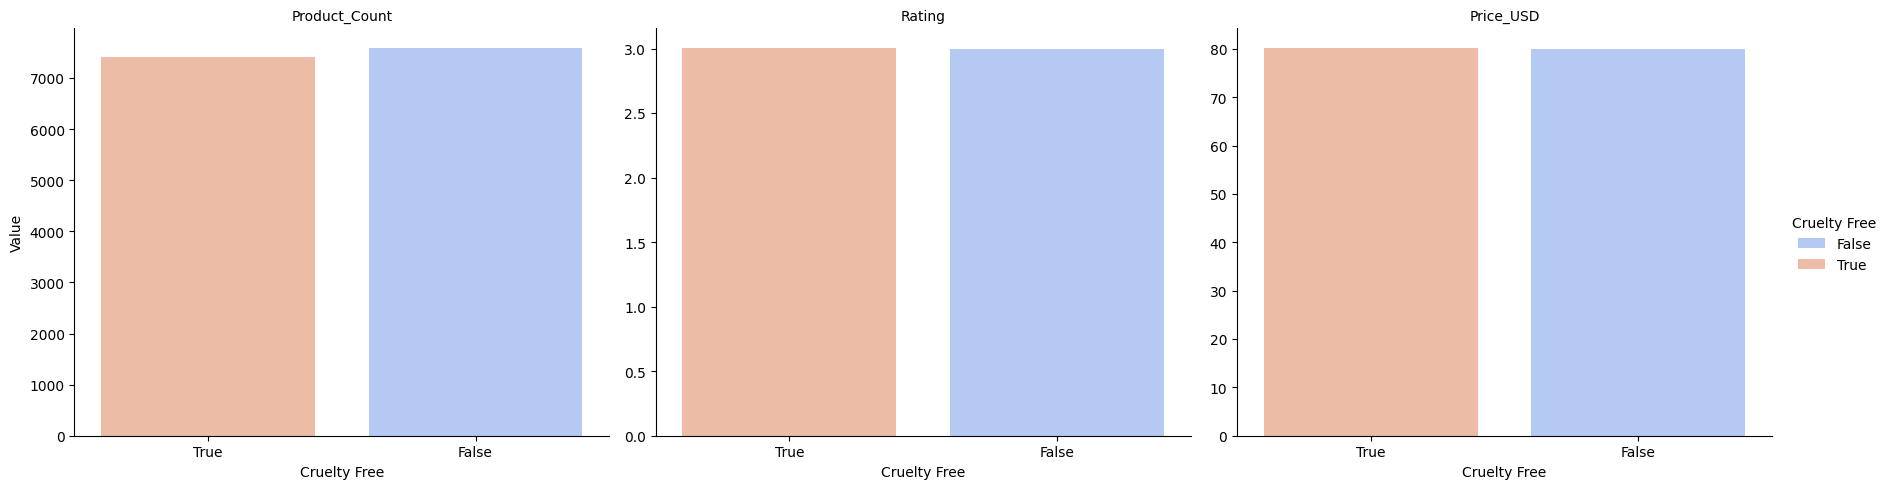

In [8]:
# Create the pivot table
pivot_table = pd.pivot_table(df, 
    values=['Price_USD', 'Rating', 'Product_Name'],
    index='Cruelty_Free',
    aggfunc={
        'Price_USD': 'mean',
        'Rating': 'mean',
        'Product_Name': 'count'
    }
).reset_index()

# Rename the 'Product_Name' column to 'Product_Count' for clarity
pivot_table = pivot_table.rename(columns={'Product_Name': 'Product_Count'})

# Melt the pivot table to create a long format suitable for faceting
melted_data = pd.melt(pivot_table, id_vars=['Cruelty_Free'], 
                      value_vars=['Product_Count', 'Rating', 'Price_USD'],
                      var_name='Metric', value_name='Value')

# Create the FacetGrid with 'Metric' as the column to facet by
g = sns.FacetGrid(melted_data, col='Metric', hue='Cruelty_Free', 
                  palette='coolwarm', sharey=False, height=5, aspect=1.2)

# Use a barplot for each facet
g.map(sns.barplot, 'Cruelty_Free', 'Value', order=[True, False], ci=None)

# Add legend and adjust the plot
# plt.figure(figsize=(14, 8))
g.add_legend(title='Cruelty Free')
g.set_axis_labels('Cruelty Free', 'Value')
g.set_titles('{col_name}')

plt.show()

### Correlation between Packaging type and Product Size by Rating score

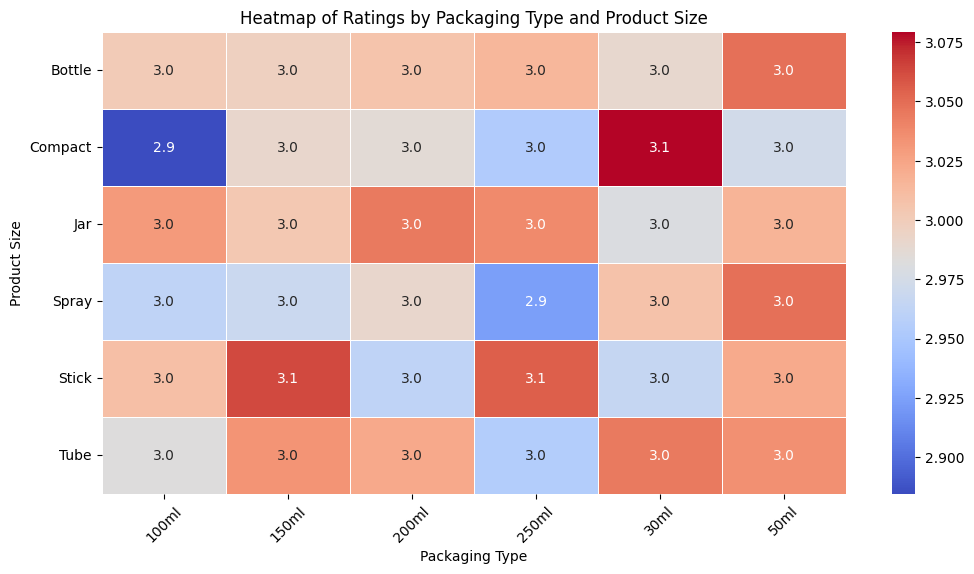

In [9]:
# Pivot table
Corr = df.pivot_table(index='Packaging_Type', columns='Product_Size', values='Rating', aggfunc='mean')

# Heatmap figure
plt.figure(figsize=(12, 6))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Heatmap of Ratings by Packaging Type and Product Size')
plt.xlabel('Packaging Type')
plt.ylabel('Product Size')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.show()


## Customer Segmentation

### Gender Target Distribution

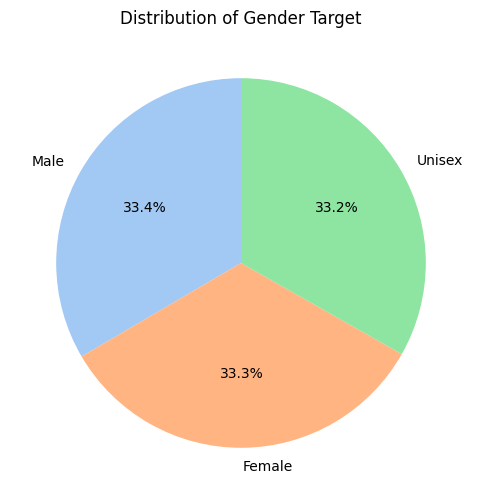

In [10]:
GenderTaget_Values = df['Gender_Target'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(GenderTaget_Values,labels = GenderTaget_Values.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Gender Target')
plt.show()

### Skin Type Satisfaction

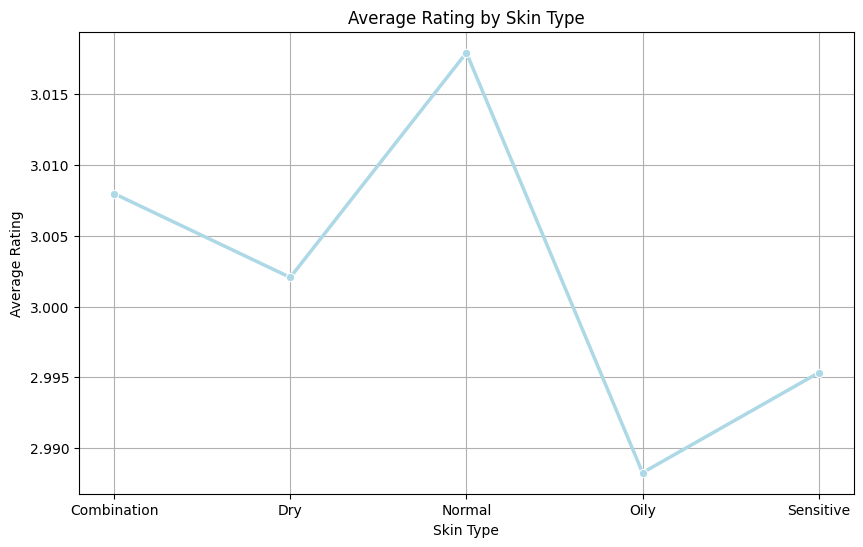

In [11]:
# Calculate the average rating per skin type
Skin_Type_Satisfaction = df.groupby(by='Skin_Type')['Rating'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=Skin_Type_Satisfaction, x='Skin_Type', y='Rating', marker='o', color='lightblue', linewidth=2.5)

# Add plot details
plt.title('Average Rating by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Average Rating')
plt.grid(True)

# Display the plot
plt.show()

### Effectiveness of Ingredients on Skin type based on Rating Score

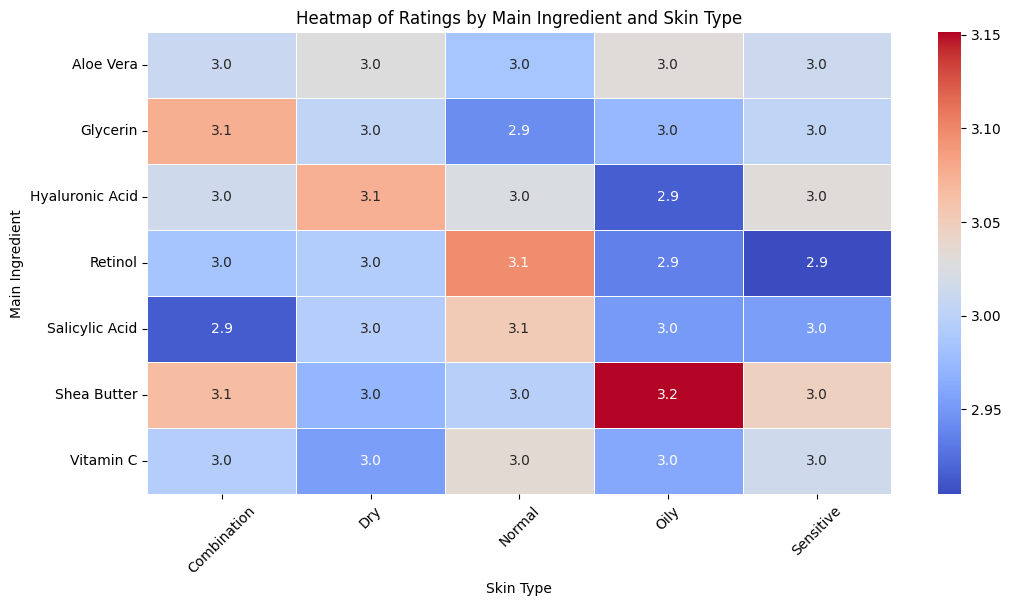

In [12]:
# Pivot table
effect = df.pivot_table(index='Main_Ingredient', columns='Skin_Type', values='Rating', aggfunc='mean')

# Heatmap figure
plt.figure(figsize=(12, 6))
sns.heatmap(effect, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Heatmap of Ratings by Main Ingredient and Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Main Ingredient')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.show()

## Pricing Strategy

### Price Distribution Per Category

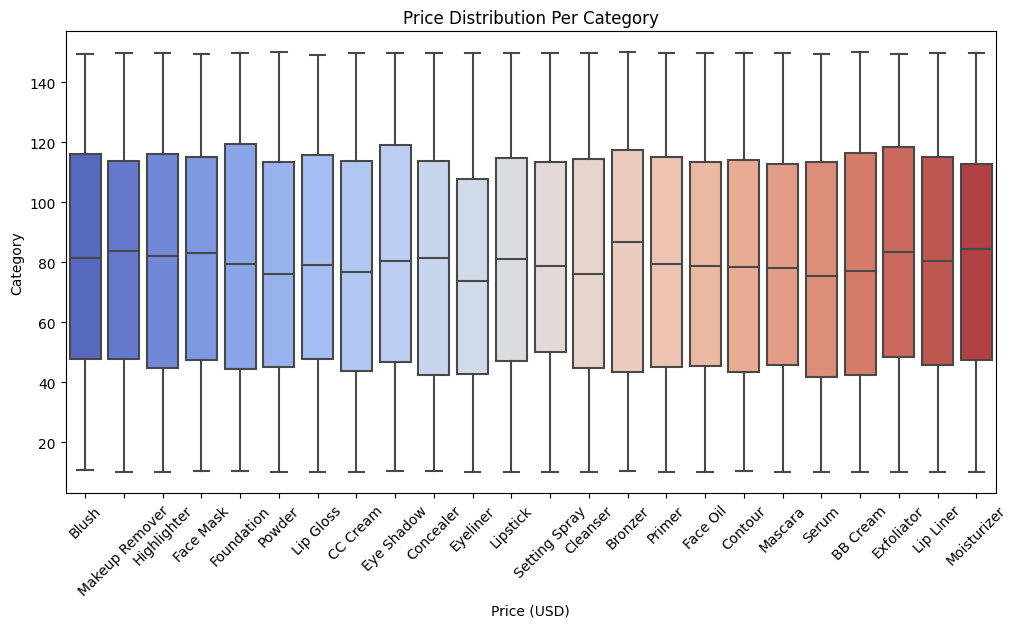

In [13]:
plt.figure(figsize=(12,6)) 
sns.boxplot(x='Category', y='Price_USD', data=df, palette='coolwarm')
plt.yticks(rotation=0) 
plt.title("Price Distribution Per Category")
plt.xlabel("Price (USD)")
plt.ylabel("Category")
plt.xticks(rotation = 45)
plt.show()

### Correlation Between Price & Rating based on Top 10 Brands

#### Top 10 Brands

In [14]:
top_brands = df.pivot_table(
    index = 'Brand',
    aggfunc = {'Product_Name' : 'count', 'Price_USD' : "mean", 'Rating' : "mean", 'Number_of_Reviews' : "sum"}
    ).reset_index().sort_values(by='Product_Name', ascending = False)

top_brands = top_brands.rename(columns={'Product_Name': 'Total_Nop', 'Price_USD' : "Avg_price", 'Rating' : "Avg_Rating"})

# Selecting the top 10 by number of products
top_brands_10 = top_brands.head(10)
top_brands_10

,Brand,Number_of_Reviews,Avg_price,Total_Nop,Avg_Rating
24,Milk Makeup,2052960,78.991408,426,3.146479
23,Make Up For Ever,2014502,82.462077,414,2.971498
20,Kiehl’s,2029989,77.478491,411,2.938929
26,NARS,2089857,76.337625,400,3.001750
10,E.l.f.,2026679,79.595714,399,3.012782
11,Farsali,1956526,81.286090,399,2.995489
39,Yves Saint Laurent,1985712,80.976777,394,2.978173
34,Sisley,1974363,78.275357,392,3.043878
2,Bite Beauty,2050069,77.430128,392,3.065816
25,Morphe,1981741,78.119770,392,3.031122


#### Average Price of Top 10 Brands

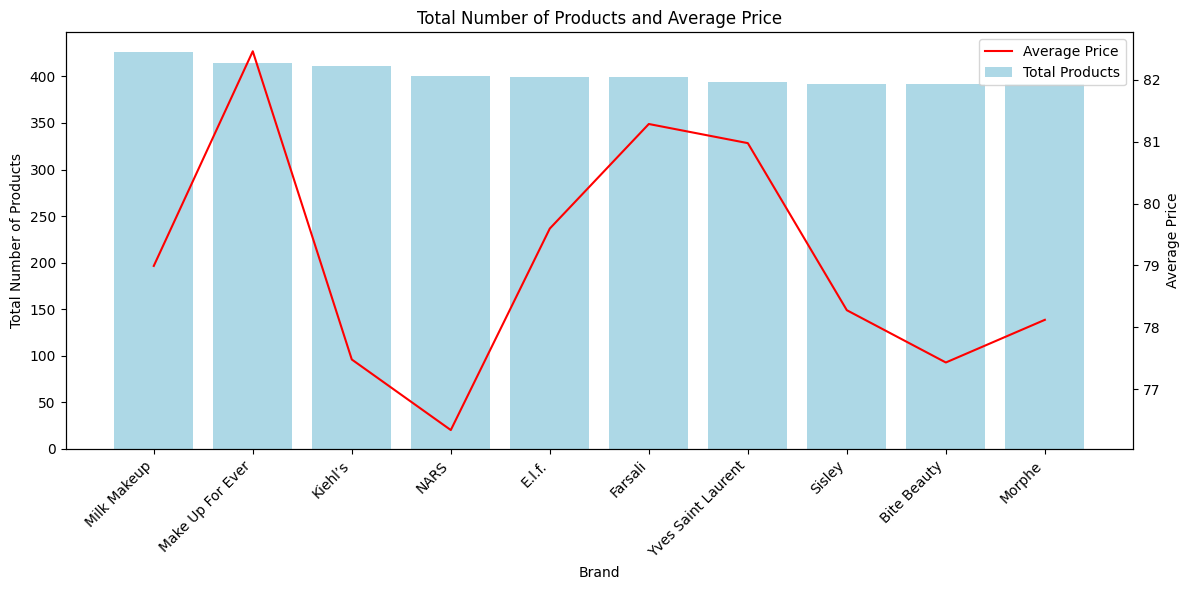

In [15]:

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total number of products
bars = ax1.bar(top_brands_10['Brand'], top_brands_10['Total_Nop'], color='lightblue', label='Total Products')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Total Number of Products')
ax1.tick_params(axis='y')
ax1.set_title('Total Number of Products and Average Price')

# Rotate and align the tick labels so they look better
plt.setp(ax1.get_xticklabels(), rotation=45, ha = 'right')

# Create a second y-axis for the average rating
ax2 = ax1.twinx()
line = ax2.plot(top_brands_10['Brand'], top_brands_10['Avg_price'], color='red', label='Average Price')
ax2.set_ylabel('Average Price')
ax2.tick_params(axis='y')

# Combine legends
lines = line + [bars]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Average Rating of Top 10 Brands

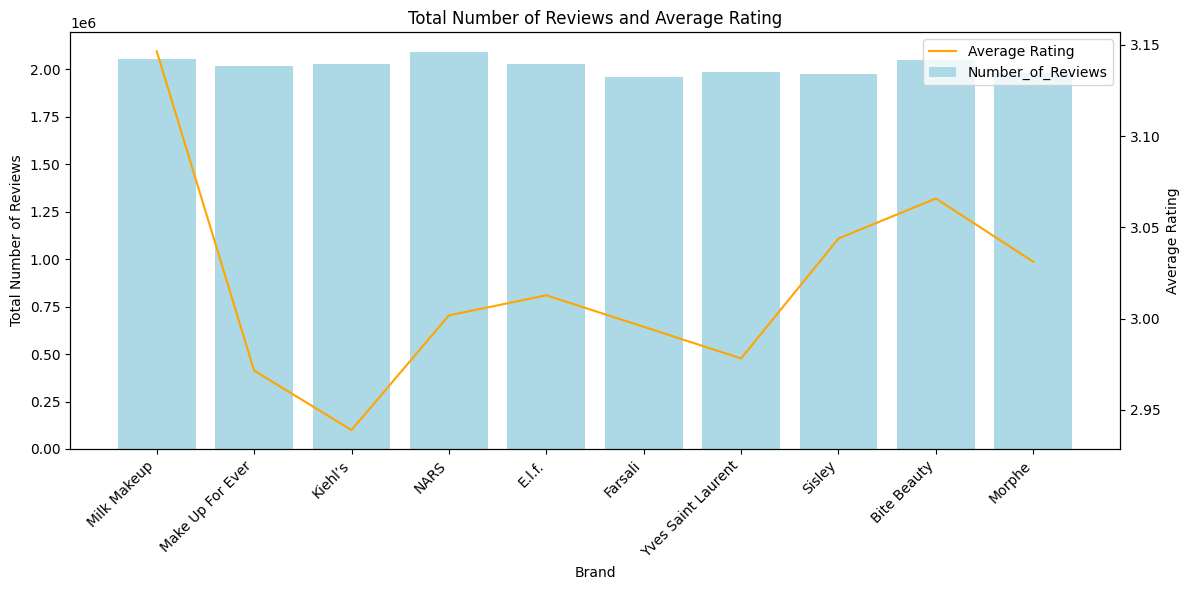

In [16]:
# Set up the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total number of products
bars = ax1.bar(top_brands_10['Brand'], top_brands_10['Number_of_Reviews'], color='lightblue', label='Number_of_Reviews')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Total Number of Reviews')
ax1.tick_params(axis='y')
ax1.set_title('Total Number of Reviews and Average Rating')

# Rotate and align the tick labels so they look better
plt.setp(ax1.get_xticklabels(), rotation=45, ha = 'right')

# Create a second y-axis for the average rating
ax2 = ax1.twinx()
line = ax2.plot(top_brands_10['Brand'], top_brands_10['Avg_Rating'], color='orange', label='Average Rating')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='y')

# Combine legends
lines = line + [bars]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()